### 분류 & 군집화
+ 두가지 모두 데이터를 비슷한 집단으로 묶는다는 점에서 유사하다.
+ 분류는 소속 집단의 정보를 이미 알고 있는 상태에서 진행하지만,  
군집화는 소속 집단의 정보가 없는 상태에서 진행한다.

#### KNN 알고리즘(분류)
+ 특징 공간에 분포하는 데이터에 대해 k개의 최근접 이웃(nearest neighbor)을 살펴보고,   
다수결 방식으로 데이터의 레이블을 결정하는 분류방식이다.
+ 다수결로 결정하기 때문에 k는 홀수로 취하는 것이 좋다.
+ 다수결 + 거리 가중치를 모두 고려할 수도 있다.
+ 특징공간에 있는 모든 데이터에 대한 정보가 필요하기 때문에, 메모리 공간과 계산 시간이 많이 필요할 수 있다.
+ 알고리즘이 단순하고 직관적이며, 사전학습이나 특별한 준비시간이 필요 없다.

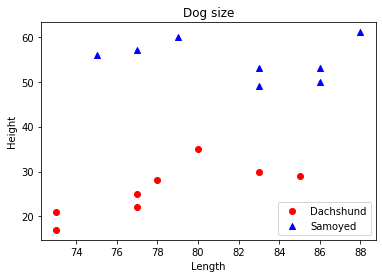

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#닥스훈트 데이터 8개
dach_length = [77, 78, 85, 83, 73, 77, 73, 80]
dach_height = [25, 28, 29, 30, 21, 22, 17, 35]

#사모예드 데이터 8개
samo_length = [75, 77, 86, 86, 79, 83, 83, 88]
samo_height = [56, 57, 50, 53, 60, 53, 49, 61]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(samo_length, samo_height, c='b', marker='^', label='Samoyed')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend();

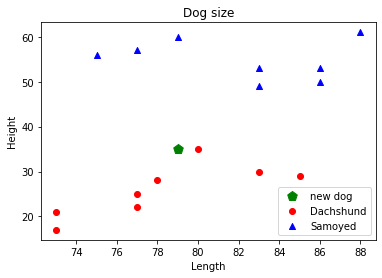

In [2]:
new_dog_length = [79]
new_dog_height = [35]

plt.scatter(new_dog_length, new_dog_height, marker='p',
            c='g', label='new dog', s=100)
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(samo_length, samo_height, c='b', marker='^', label='Samoyed')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend();

그래프를 봤을 때 닥스훈트 데이터와 사모예드 데이터 사이쯤 위치하지만 빨간 점들에 더 가까워보인다.  
실제로 KNN 알고리즘을 적용한 결과도 확인해보자

In [3]:
dach_data = np.column_stack((dach_length, dach_height))   #(8, 2)
dach_label = np.zeros(len(dach_data))                     #닥스훈트 데이터에 0 라벨링

samo_data = np.column_stack((samo_length, samo_height))   #(8, 2)
samo_label = np.ones(len(samo_data))                      #사모예드 데이터에 1 라벨링

data = np.concatenate((dach_data, samo_data))             #(16, 2)
labels = np.concatenate((dach_label, samo_label))         #(16, )

In [4]:
from sklearn.neighbors import KNeighborsClassifier

dog_class = {0.:'Dachshund',
             1.:'Samoyed'}

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data, labels)

new_data = [[79, 35]]
y_pred = knn.predict(new_data)

print(f'length {new_data[0][0]}, height {new_data[0][1]} ===> {dog_class[y_pred[0]]}')

length 79, height 35 ===> Dachshund


#### Quiz
+ 길이 82, 높이 40인 데이터를 녹색 점으로 표시해라.  
+ KNN 알고리즘을 적용해보면서 K가 1, 5, 9일 때 변화를 확인해라.

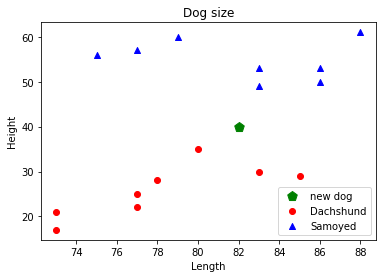

In [5]:
new_dog_length = [82]
new_dog_height = [40]

plt.scatter(new_dog_length, new_dog_height, marker='p',
            c='g', label='new dog', s=100)
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(samo_length, samo_height, c='b', marker='^', label='Samoyed')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Dog size')
plt.legend();

In [8]:
dach_data = np.column_stack((dach_length, dach_height))   #(8, 2)
dach_label = np.zeros(len(dach_data))                     #닥스훈트 데이터에 0 라벨링

samo_data = np.column_stack((samo_length, samo_height))   #(8, 2)
samo_label = np.ones(len(samo_data))                      #사모예드 데이터에 1 라벨링

data = np.concatenate((dach_data, samo_data))             #(16, 2)
labels = np.concatenate((dach_label, samo_label))         #(16, )

dog_class = {0.:'Dachshund',
             1.:'Samoyed'}

print(f'length {new_data[0][0]}, height {new_data[0][1]}')
K = [1, 5, 9, 15]
for k in K:      
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, labels)

    new_data = [[82, 40]]
    y_pred = knn.predict(new_data)

    print(f'K = {k} ===> {dog_class[y_pred[0]]}')

length 82, height 40
K = 1 ===> Dachshund
K = 5 ===> Dachshund
K = 9 ===> Dachshund
K = 15 ===> Samoyed


### Iris data
+ sklearn 라이브러리에서 제공하는 데이터셋

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris['feature_names'])
df['label'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
X = df.iloc[:, 0:4].values
y = df.label.values

X.shape, y.shape

((150, 4), (150,))

In [30]:
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def iris_knn(X, y, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred)
    return knn_accuracy

K = [3, 9, 15, 30]
for k in K:
    score = iris_knn(X, y, k)
    print(f'K = {k}일 때 정확도 : {score}')

K = 3일 때 정확도 : 1.0
K = 9일 때 정확도 : 0.9777777777777777
K = 15일 때 정확도 : 0.9777777777777777
K = 30일 때 정확도 : 0.9555555555555556


iris 데이터 전체를 학습시킨 후 새로운 데이터를 예측해보자.

In [31]:
iris = load_iris()
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(iris.data, iris.target)

iris_class = {0:'setosa', 
           1:'versicolor',
           2:'virginica'}

X = [[4, 2, 1.3, 0.4],
     [4, 3, 3.2, 2.2]]
y = knn.predict(X)

print(f'{X[0]} 특성 ===> {iris_class[y[0]]}')
print(f'{X[1]} 특성 ===> {iris_class[y[1]]}')

[4, 2, 1.3, 0.4] 특성 ===> setosa
[4, 3, 3.2, 2.2] 특성 ===> versicolor


In [34]:
y_pred_all = knn.predict(iris.data)
score = accuracy_score(iris.target, y_pred_all)
score   #정확도 96% => 100개 중 4개는 틀리게 분류했다는 의미

0.96

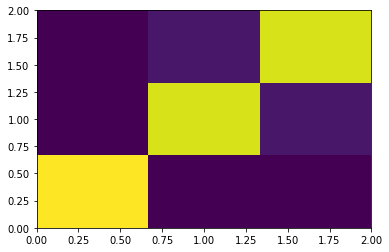

In [36]:
plt.hist2d(iris.target, y_pred_all, bins=(3,3));

In [37]:
from sklearn.metrics import confusion_matrix as cm

cm(iris.target, y_pred_all)    #라벨이 0인 데이터는 모두 맞게, 1, 2인 데이터는 3개씩 틀리게 분류했음

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

### 평가지표
+ 개와 고양이를 분류하기 위한 표본 데이터가 개 99마리, 고양이 1마리의 데이터인 경우(표집편향),  
무조건 개로 분류하게만 한다면 정확도 99%의 모델이 될 수 있다.
#### => 정밀도(precision), 재현율(recall) 사용
+ 정밀도 : 양성으로 분류한 경우 실제 양성인 경우의 비율(TP / (FN + TP))
+ 재현율 : 실제 양성인 경우 올바르게 양성으로 분류한 비율(TP / (TP + FP))
+ F1 score: 정밀도와 재현율의 조화평균(2 * (pre * rec) / (pre + rec))
+ TN / TP / FN/ FP
    + TN : True negative, 실제 음성, 예측 음성
    + TP : True positive, 실제 양성, 예측 양성
    + FN : False negative, 실제 양성, 예측 음성
    + FP : False positive, 실제 음성, 예측 양성

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

### 앙상블
여러 모델이 각자의 분류 결과를 내놓으면, 그것들을 모두 고려해 최종 결과를 선택하는 방법이다.
+ Bagging : 한 모델에 사용된 데이터가 다른 모델의 학습에도 사용될 수 있다. => 복원추출
    + Boosting : 배깅 기법을 개선한 방법으로, 모델 학습을 순차적으로 진행하면서  
    다음 모델에서는 이전 모델에서 잘못 처리한 데이터를 더 잘 다룰 수 있도록 한다. ex) AdaBoost
+ Pasting : 다른 모델이 같은 데이터를 사용할 수 없다. => 비복원추출
